## **MNIST Numpy Classifier**

#Importing necessary libraries

In [122]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Activation, Dropout, Reshape
import sys
import seaborn as sns

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#Load data from Keras

In [57]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

digits, labels = (X_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

In [58]:
X_train.size

47040000

In [59]:
X_test.size

7840000

In [60]:
X_train.shape

(60000, 28, 28)

In [61]:
X_test.shape

(10000, 28, 28)

#Visualize data

In [62]:
sns.set(style='white', context='notebook', palette='deep')
def countplot(values):
  sns.countplot(values)

In [63]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


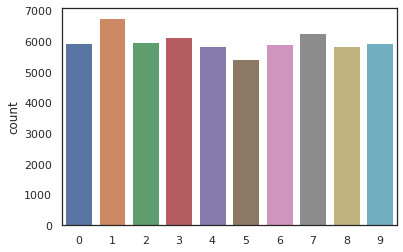

In [64]:
countplot(y_train)

#One hot encoding

In [65]:
#converting integer to binary variables
encode_labels = np.zeros((len(labels),10))

for i,l in enumerate(labels):
    encode_labels[i][l] = 1
labels = encode_labels

In [105]:
#reshape digits
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [106]:
test_digits = X_test.reshape(len(X_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

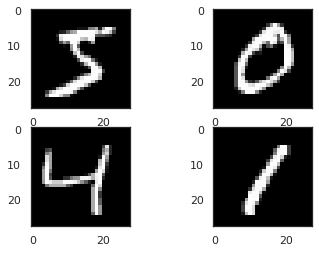

In [107]:
#Plot the digit images in grayscale
plt.subplot(221)
plt.imshow(X_train[0][:,:,0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1][:,:,0], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2][:,:,0], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3][:,:,0], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

#Input Normalization

In [70]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [71]:
#activation function
np.random.seed(1)

# returns x if x > 0, return 0 otherwise
Relu = lambda x:(x>=0) * x 

# returns 1 for input > 0, return 0 otherwise
Relu_derivative = lambda x: x>=0 

In [111]:
lr, epoch, hidden_size, pixels, numLabels = (0.005, 100, 40, 784, 10)

In [112]:
#weights initialization
weights0_1 = 0.2*np.random.random((pixels,hidden_size)) - 0.1
weights1_2 = 0.2*np.random.random((hidden_size,numLabels)) - 0.1

#Dropout

In [113]:
def dropout_mask(layer, drop):
  return np.random.randint(drop, size=layer.shape)

In [114]:
for j in range(epoch):
    error, correctCnt = (0.0, 0)

    for i in range(len(digits)):
        layer_0 = digits[i:i+1]
        layer_1 = Relu(np.dot(layer_0,weights0_1))
        layer_2 = np.dot(layer_1,weights1_2)

        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correctCnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))

        layer_2_deltaChange = (labels[i:i+1] - layer_2)
        layer_1_deltaChange = layer_2_deltaChange.dot(weights1_2.T) * Relu_derivative(layer_1)

        weights1_2 += lr * layer_1.T.dot(layer_2_deltaChange)
        weights0_1 += lr * layer_0.T.dot(layer_1_deltaChange)
        
    print("\r Epoch:" + str(j) + " Training-Error:" + str(error/float(len(digits)))[0:5] + ", Training-Accuracy:" + str(correctCnt/float(len(digits))))

 Epoch:0 Training-Error:0.727, Training-Accuracy:0.528
 Epoch:1 Training-Error:0.515, Training-Accuracy:0.775
 Epoch:2 Training-Error:0.444, Training-Accuracy:0.821
 Epoch:3 Training-Error:0.404, Training-Accuracy:0.832
 Epoch:4 Training-Error:0.374, Training-Accuracy:0.855
 Epoch:5 Training-Error:0.351, Training-Accuracy:0.863
 Epoch:6 Training-Error:0.332, Training-Accuracy:0.87
 Epoch:7 Training-Error:0.316, Training-Accuracy:0.887
 Epoch:8 Training-Error:0.302, Training-Accuracy:0.897
 Epoch:9 Training-Error:0.290, Training-Accuracy:0.905
 Epoch:10 Training-Error:0.280, Training-Accuracy:0.911
 Epoch:11 Training-Error:0.271, Training-Accuracy:0.919
 Epoch:12 Training-Error:0.263, Training-Accuracy:0.921
 Epoch:13 Training-Error:0.256, Training-Accuracy:0.923
 Epoch:14 Training-Error:0.250, Training-Accuracy:0.926
 Epoch:15 Training-Error:0.245, Training-Accuracy:0.929
 Epoch:16 Training-Error:0.240, Training-Accuracy:0.93
 Epoch:17 Training-Error:0.236, Training-Accuracy:0.933
 Epo

#Minibatch Gradient Descent

In [115]:
import numpy, sys
np.random.seed(1)

def Relu(x):
    # returns x if x > 0
    return ( x >= 0 ) * x

def Relu_derivative(output):
    # returns 1 for input > 0
    return output >= 0 

minibatch = 64

lr, epoch, hidden_size, = (0.005, 100, 100)
pixels, numLabels = (784, 10)

weights0_1 = 0.2*np.random.random((pixels, hidden_size)) - 0.1
weights1_2 = 0.2*np.random.random((hidden_size, numLabels)) - 0.1

for j in range(epoch):
    error, correctCnt = (0.0, 0)

    for i in range(int(len(digits) / minibatch)):
        minibatch_start, minibatch_end = ((i * minibatch), ((i+1)*minibatch))

        layer_0 = digits[minibatch_start:minibatch_end]
        layer_1 = Relu(np.dot(layer_0,weights0_1))

        # Adding Dropout
        dropOut_mask = np.random.randint(2, size=layer_1.shape)

        layer_1 *= dropOut_mask * 2
        layer_2 = np.dot(layer_1, weights1_2)  

        error += np.sum((labels[minibatch_start:minibatch_end] - layer_2) ** 2)
        for k in range(minibatch):
            correctCnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[minibatch_start+k:minibatch_start+k+1]))

        layer_2_deltaChange = (labels[minibatch_start:minibatch_end] - layer_2) / minibatch
        layer_1_deltaChange = layer_2_deltaChange.dot(weights1_2.T) * Relu_derivative(layer_1)

        layer_1_deltaChange *+ dropOut_mask

        weights1_2 += lr * layer_1.T.dot(layer_2_deltaChange)
        weights0_1 += lr * layer_0.T.dot(layer_1_deltaChange)

    if(j % 10 == 0 or j == epoch-1):
        testError, testCorrectcnt = (0.0, 0)

    for i in range(len(test_digits)):
      
        layer_0 = test_digits[i:i+1]
        layer_1 = Relu(np.dot(layer_0,weights0_1))
        layer_2 = np.dot(layer_1,weights1_2)

        testError += np.sum((test_labels[i:i+1] - layer_2) ** 2)
        testCorrectcnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
      

    print("\r Epoch:" + str(j) + " Training-Error:" + str(error/float(len(digits)))[0:5] + "-> Training-Accuracy:" + str(correctCnt/float(len(digits))) + \
          ", Test-Error:" + str(testError/float(len(test_digits)))[0:5] + " -> Test-Accuracy:" + str(testCorrectcnt/float(len(test_digits))))
    # print("\r Epoch:" + str(j) + " Training-Error:" + str(error/float(len(digits)))[0:5] + ", Training-Accuracy:" + str(correctCnt/float(len(digits))))

 Epoch:0 Training-Error:1.722-> Training-Accuracy:0.081, Test-Error:0.999 -> Test-Accuracy:0.1119
 Epoch:1 Training-Error:1.439-> Training-Accuracy:0.104, Test-Error:1.998 -> Test-Accuracy:0.2711
 Epoch:2 Training-Error:1.332-> Training-Accuracy:0.152, Test-Error:2.997 -> Test-Accuracy:0.4721
 Epoch:3 Training-Error:1.277-> Training-Accuracy:0.146, Test-Error:3.996 -> Test-Accuracy:0.7134
 Epoch:4 Training-Error:1.189-> Training-Accuracy:0.183, Test-Error:4.994 -> Test-Accuracy:0.9908
 Epoch:5 Training-Error:1.139-> Training-Accuracy:0.206, Test-Error:5.993 -> Test-Accuracy:1.3057
 Epoch:6 Training-Error:1.116-> Training-Accuracy:0.21, Test-Error:6.991 -> Test-Accuracy:1.657
 Epoch:7 Training-Error:1.088-> Training-Accuracy:0.241, Test-Error:7.990 -> Test-Accuracy:2.0361
 Epoch:8 Training-Error:1.054-> Training-Accuracy:0.254, Test-Error:8.988 -> Test-Accuracy:2.4366
 Epoch:9 Training-Error:1.020-> Training-Accuracy:0.295, Test-Error:9.986 -> Test-Accuracy:2.8661
 Epoch:10 Training-Err

#Data Augmentation

In [138]:
from keras.preprocessing.image import ImageDataGenerator
def data_augmentation(images, labels, batch_size):
  datagen = ImageDataGenerator(
          featurewise_center=False,  # set input mean to 0 over the dataset
          samplewise_center=False,  # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,  # apply ZCA whitening
          rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
          zoom_range = 0.1, # Randomly zoom image 
          width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
          horizontal_flip=False,  # randomly flip images
          vertical_flip=False)  # randomly flip images

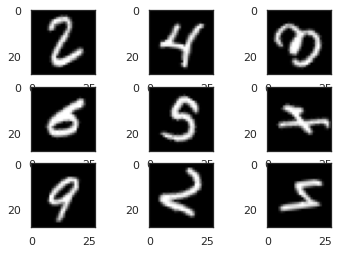

In [125]:
datagen = ImageDataGenerator(rotation_range=90)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  
  for i in range(0,9):
    plt.subplot(330 + 1 +i)
    plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))

  plt.show()

In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()